# 1. Import một số thư viện cần thiết

In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [33]:
SAB = pd.read_csv("SAB.csv")

In [34]:
SAB

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"242,000","236,300","246,000","236,300",31.25K,0.83%
1,3/4/2019,"242,000","240,000","245,500","239,000",44.09K,0.00%
2,3/5/2019,"243,500","244,500","244,800","240,100",10.22K,0.62%
3,3/6/2019,"243,900","240,400","245,000","240,000",22.91K,0.16%
4,3/7/2019,"241,100","242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,5/29/2024,"60,500","61,000","61,300","60,300",1.47M,-0.82%
1311,5/30/2024,"59,300","59,600","60,000","58,300",1.67M,-1.98%
1312,5/31/2024,"58,300","59,300","59,300","58,300",1.49M,-1.69%
1313,6/3/2024,"59,400","59,000","60,100","58,700",1.13M,1.89%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [35]:
# Drop missing values
SAB = SAB.dropna()
SAB["Price"] = SAB["Price"].str.replace(',', '').astype(float)
# Reset the index
SAB = SAB.reset_index(drop=True)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

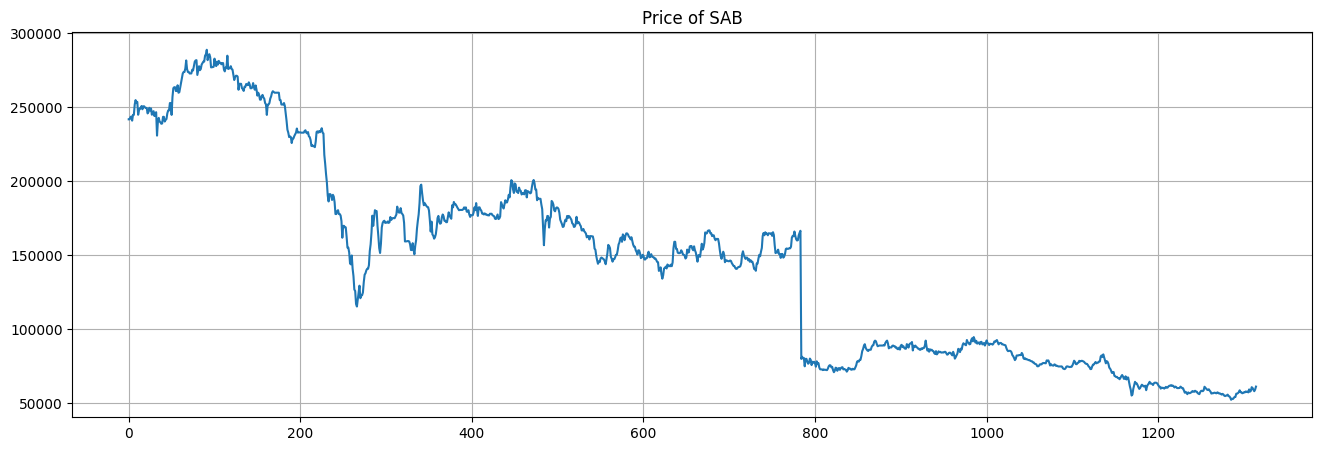

In [36]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(SAB["Price"])
plt.title('Price of SAB')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test theo tỉ lệ 7:3

In [37]:
# Split the data into training, testing sets
train_size = int(0.7 * len(SAB))

In [38]:
train_data = SAB[:train_size]
test_data = SAB[train_size:]

<h1> Quá trình training

In [39]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [40]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình dự đoán giá cổ phiếu trong 30,60,90 ngày tiếp theo

In [41]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  SAB.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


<h1>Đánh giá độ chính xác của thuật toán

In [42]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 25626.472311238456


In [43]:
#MAE
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

Testing MAE: 23112.903965370057


In [44]:
#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 34.581394655419494


<h1>Vẽ hình mô tả dự đoán

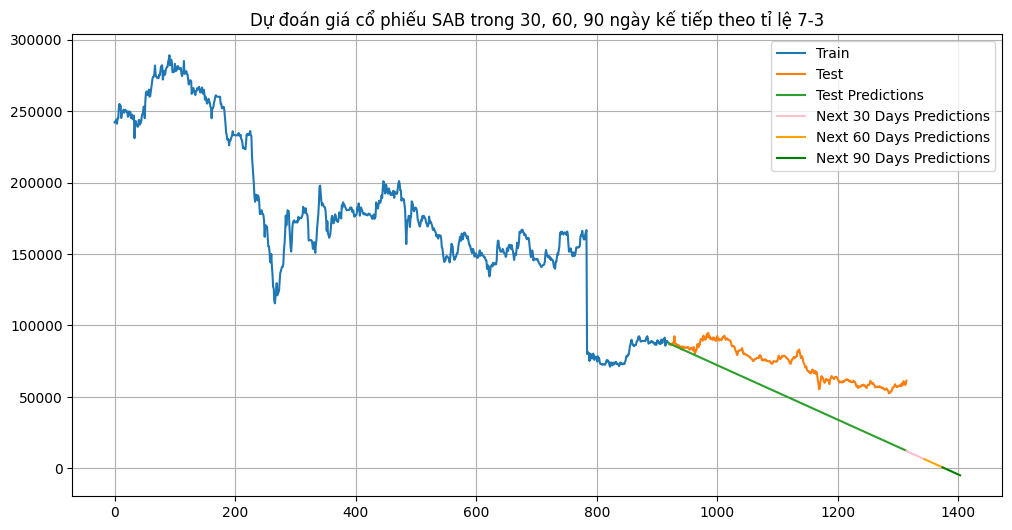

In [45]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu SAB trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 7-3")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'Test Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test theo tỉ lệ 8:2

In [46]:
# Split the data into training, testing sets
train_size = int(0.8 * len(SAB))

In [47]:
train_data = SAB[:train_size]
test_data = SAB[train_size:]

<h1>Quá trình training

In [48]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [49]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình dự đoán giá cổ phiếu trong 30,60,90 ngày tiếp theo

In [50]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  SAB.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

<h1>Đánh giá độ chính xác của thuật toán

In [51]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 23326.413896717455


In [52]:
#MAE
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

Testing MAE: 22220.451805157805


In [53]:
#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 34.97046751038895


<h1>Vẽ hình mô tả dự đoán

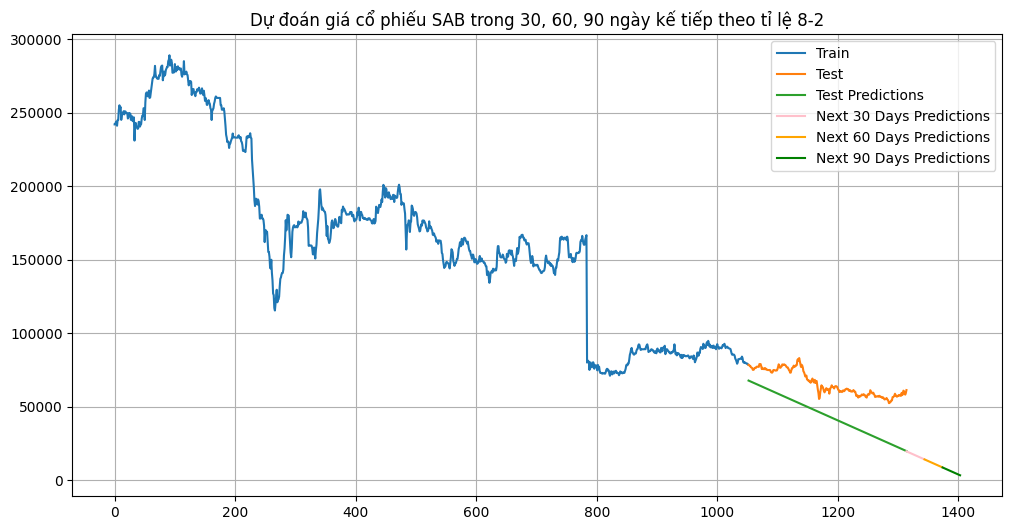

In [54]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu SAB trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 8-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'Test Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test theo tỉ lệ 9:1

In [55]:
# Split the data into training, testing sets
train_size = int(0.9 * len(SAB))

In [56]:
train_data = SAB[:train_size]
test_data = SAB[train_size:]

<h1> Quá trình training

In [57]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [58]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình dự đoán giá cổ phiếu trong 30,60,90 ngày tiếp theo

In [59]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  SAB.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

<h1>Đánh giá độ chính xác của thuật toán

In [60]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 19936.54524875123


In [61]:
#MAE
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

Testing MAE: 19260.65245224788


In [62]:
#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 32.91792443903976


<h1>Vẽ hình mô tả dự đoán

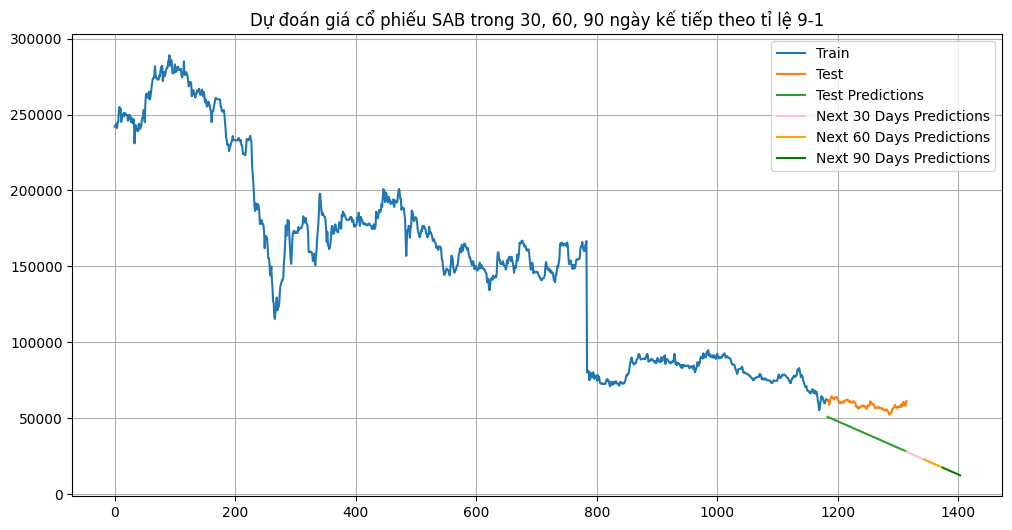

In [63]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu SAB trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 9-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'Test Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()